### 导入相关程序库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 获取KPI名称和KPI ID对应关系

In [2]:
kpi_id_path = r'D:\userdata\anliu\Desktop'
kpi_id_name = r'kpi_id_17a.csv'
kpi_id_file = os.path.join(kpi_id_path, kpi_id_name)

try:
    os.chdir(kpi_id_path)
except:
    print("The folder does not existed!")
    
kpi_def = pd.read_csv(kpi_id_file)
kpi_def.dropna(axis=1, how='all', inplace=True)

def query_kpi_id(kpi_id):   
    mask = kpi_def.loc[kpi_def.loc[:, 'KPI ID'] == kpi_id]
    
    kpi_name = mask['Name'].values[0]
    kpi_formula = mask['Formula'].values[0]
    kpi_level = mask['Level'].values[0]
    
    return kpi_id, kpi_name, kpi_formula, kpi_level

### 分析KPI数据

In [3]:
# kpi log所在文件路径
kpi_data_path = r'D:\userdata\anliu\Desktop'
kpi_data_name = r'test6.csv'
kpi_data_file = os.path.join(kpi_data_path, kpi_data_name)

# 切换到kpi log所在路径
try:
    os.chdir(kpi_data_path)
except:
    print("The folder does not existed!")

#### 读取eNB软件版本

In [4]:
# 读取csv文件，返回有效数据起始行数
def fetch_sw_version(file):
    nrow = 0
    with open(file,"r") as f:
        sw_version = f.readline()
        sw_version = sw_version.strip()
        sw_version = sw_version.split(',')[0]
    
    return sw_version

In [5]:
print(fetch_sw_version(kpi_data_file))

TL18A_FSM4_9999_180831_023567


#### 读取KPI数据

In [6]:
# 从CSV文件中读取数据并存储为dataframe
def read_kpi_data(file):
    data = pd.read_csv(file, low_memory=True, skiprows=3, error_bad_lines=False, warn_bad_lines=False)
    return data

# 整理数据
# 如果某些列不全部都是NA值，使用中位数填充NA值
from sklearn.preprocessing import Imputer
def fill_na_data(data):
    # print(np.where(data.isnull()))
    imputer = Imputer(strategy='median')
    imputer.fit(data)
    X = imputer.transform(data)
    # imputer只对数据处理，会删除column和index name，转化为dataframe需要重新添加column name和index name
    data = pd.DataFrame(X, columns=data.columns, index=data.index)
    # np.where(data.isnull())
    
    return data

def clean_up_data(data):  
    # 替换第一列名称为Time
    names = data.columns.tolist()
    names[names.index('Period start time')] = 'Time'
    data.columns = names
    data['Time'] = pd.to_datetime(data['Time'])  
    data.set_index('Time', inplace=True)
    
    # 删除值全部为NA的列
    data.dropna(axis=1, how='all', inplace=True)
    
    # 如果某些列不全部都是NA值，使用中位数填充NA值
    data = fill_na_data(data)
    
    return data

#### 读取和整理的KPI数据，打印数据基本信息

In [7]:
# 读取整理数据
kpi_data = read_kpi_data(kpi_data_file)
kpi_data = clean_up_data(kpi_data)
print(kpi_data.info())
print(kpi_data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2018-09-01 17:30:00 to 2018-09-02 17:15:00
Data columns (total 26 columns):
LTE_5017a    96 non-null float64
LTE_5025h    96 non-null float64
LTE_5572f    96 non-null float64
LTE_5218g    96 non-null float64
LTE_5048b    96 non-null float64
LTE_5880a    96 non-null float64
LTE_5137a    96 non-null float64
LTE_5134a    96 non-null float64
LTE_5216a    96 non-null float64
LTE_5441b    96 non-null float64
LTE_5444b    96 non-null float64
LTE_5541b    96 non-null float64
LTE_5544b    96 non-null float64
LTE_5427c    96 non-null float64
LTE_5432b    96 non-null float64
LTE_5292d    96 non-null float64
LTE_5289d    96 non-null float64
LTE_5276b    96 non-null float64
LTE_5273b    96 non-null float64
LTE_6265a    96 non-null float64
LTE_5204c    96 non-null float64
LTE_5646a    96 non-null float64
LTE_5311b    96 non-null float64
LTE_5305c    96 non-null float64
LTE_5256c    96 non-null float64
LTE_5471a    96 non-null float64
d

#### 打印当前导入KPI数据文件中KPI ID对应的KPI名字

In [8]:
def read_kpi_name(columns):
    for kpi_id in columns:
        try:
            kpi = query_kpi_id(kpi_id)
            print(kpi_id + ": " + kpi[1])
        except:
            print(kpi_id + ': does not existed!')

read_kpi_name(kpi_data.columns)

LTE_5017a: E-UTRAN E-RAB Setup Success Ratio
LTE_5025h: E-UTRAN E-RAB Drop Ratio, RAN View
LTE_5572f: E-UTRAN E-RAB QCI1 Drop Ratio, RAN View
LTE_5218g: Total E-UTRAN RRC Connection Setup Success Ratio
LTE_5048b: E-UTRAN HO Success Ratio, Inter eNB X2 based
LTE_5880a: E-UTRAN HO Success Ratio, inter eNB X2 based for QCI1
LTE_5137a: E-UTRAN Average Latency Uplink
LTE_5134a: E-UTRAN Average Latency Downlink
LTE_5216a: E-UTRAN MAC PDU Re-transmission Ratio Downlink
LTE_5441b: E-UTRAN Average RSSI for PUCCH
LTE_5444b: Average RSSI for PUSCH
LTE_5541b: E-UTRAN Average SINR for PUCCH
LTE_5544b: E-UTRAN Average SINR for PUSCH
LTE_5427c: E-UTRAN Average CQI
LTE_5432b: E-UTRAN Average CQI Offset
LTE_5292d: E-UTRAN average PDCP Layer Active Cell Throughput DL
LTE_5289d: E-UTRAN average PDCP Layer Active Cell Throughput UL
LTE_5276b: E-UTRAN average PRB usage per TTI DL
LTE_5273b: E-UTRAN Average PRB usage per TTI UL
LTE_6265a: E-UTRAN Maximum Number of RRC Connected UEs per cell
LTE_5204c: E-UTR

#### 分析KPI数据

In [9]:
# 定义KPI组合
cell_load = ['LTE_6245a', 'LTE_6265a', 'LTE_5214b', 'LTE_5804c', 'LTE_5242b', 'LTE_5394a', 'LTE_6001a', 'LTE_6002a',
             'LTE_5319c', 'LTE_5320b', 'LTE_5672b', 'LTE_5674b', 'LTE_5837b', 'LTE_5838b', 'LTE_5999a', 'LTE_753c', 
             'LTE_5320b', 'LTE_5656b', ]
cell_meas = ['LTE_5368a', 'LTE_5369a', 'LTE_5370a', 'LTE_5371a', 'LTE_5427c', 'LTE_5432b', 'LTE_1552b', 'LTE_1553a',
             'LTE_5273b', 'LTE_5276b', 'LTE_5657a']
cplane = ['LTE_5017a', 'LTE_5218g', 'LTE_5204c', 'LTE_5693a', 'LTE_5025h', 'LTE_5572f',
          'LTE_5035a', 'LTE_5568a', 'LTE_5114a', 'LTE_5048b', 'LTE_5873a', 'LTE_5886a', 'LTE_5082a', 'LTE_5884a', 
          'LTE_5880a', 'LTE_5882a', 'LTE_5567a']
uplane = ['LTE_5292d', 'LTE_5289d', 'LTE_5276b', 'LTE_5273b', 'LTE_1074a', 'LTE_1075a']

# 根据counter提取数据
def kpi_filter_counter(data, comb_list):
    comb_list = [c for c in data.columns if c in comb_list]
    read_kpi_name(comb_list)
    data = data.loc[:, comb_list]
    
    return data

# 根据时间提取数据
def kpi_filter_time(data, start, end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    data = data.loc[start:end, :]
    
    return data

#####  标准化数据和特征选择

In [10]:
# 标准化数据
'''StandardScaler method subtracts the mean value and then it divides by the variance so that the resulting
distribution has unit variance. Standardization does not bound values to a specific range, which may be a problem for 
some algorithms (e.g. neural networks often expect an input value ranging from 0 to 1). However, standardization
is much less affected by outliers.
'''
from sklearn.preprocessing import StandardScaler
def data_scale(data):
    ss = StandardScaler()
    X = ss.fit_transform(data)
    data = pd.DataFrame(X, columns=data.columns, index=data.index)
    
    return data

# 特征选择
from sklearn.feature_selection import VarianceThreshold
# 方差选择，返回值为特征选择后的数据
# 参数threshold为方差的阈值
def variance_selection(data):
    sel = VarianceThreshold(threshold=0) #去掉那些方差等于0的值
    X = sel.fit_transform(data)
    feat_mask = sel.get_support() # Get a mask, or integer index, of the features selected
    # 保留mask值为1的特征
    columns = [data.columns[i] for i, e in enumerate(feat_mask) if e]
    data = pd.DataFrame(X, columns=columns, index=data.index)
    
    return data

In [11]:
# start = '2018/6/15  21:00'
# end = '2018-06-16 10:0:0'
# kpi_data_time = kpi_filter_time(kpi_data, start, end)

# 标准化数据
kpi_data_scale = data_scale(kpi_data)

# 特征选择，去除不必要的特征
print(kpi_data_scale.shape)
kpi_data_selected = variance_selection(kpi_data_scale)
print(kpi_data_selected.shape)

(96, 26)
(96, 20)


##### 根据小区traffic特征进行分类

LTE_6265a: E-UTRAN Maximum Number of RRC Connected UEs per cell


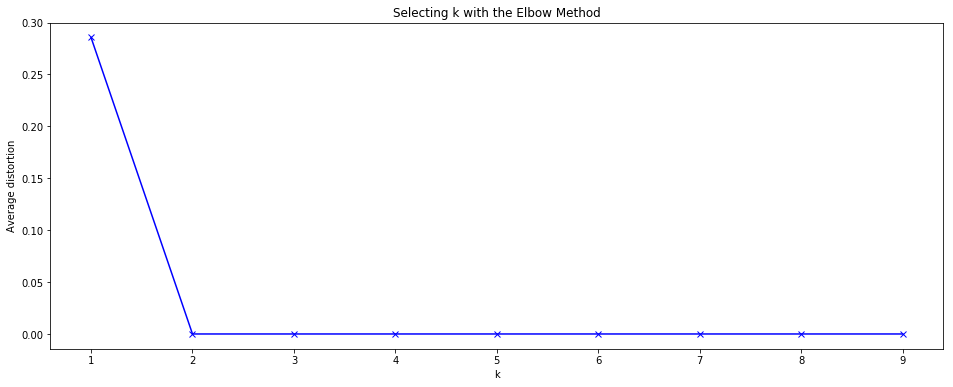

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2018-09-01 17:30:00 to 2018-09-02 17:15:00
Data columns (total 1 columns):
LTE_6265a    96 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB
None
          LTE_6265a
count  9.600000e+01
mean   4.022245e-15
std    1.005249e+00
min   -6.855655e+00
25%    1.458650e-01
50%    1.458650e-01
75%    1.458650e-01
max    1.458650e-01


In [12]:
cell_load_data = kpi_filter_counter(kpi_data_scale, cell_load)

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cell_load_data)
    # cdist函数用于计算两个输入集合的距离，通过metric参数指定计算距离的不同方式得到不同的距离度量值   
    meandistortions.append(sum(np.min(cdist(cell_load_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / cell_load_data.shape[0])

fig = plt.figure(1,(16,6))
ax = fig.add_subplot(1,1,1)

ax.plot(K, meandistortions, 'bx-')
ax.set_xlabel('k')
ax.set_ylabel('Average distortion')
ax.set_title('Selecting k with the Elbow Method')
plt.show()

print(cell_load_data.info())
print(cell_load_data.describe())

##### 过滤出高相关系数的KPI名字，移除具有高相关系数的KPI项

In [13]:
def get_high_corr(data, threshold):
    corr = data.corr()
    corr.dropna(axis=(0,1), how='all', inplace=True)
#     fig = plt.figure(figsize=(20,12))
#     sns.heatmap(corr, linewidths = 0.05);
    mask = np.where(corr > threshold)
    high_corr_comb = [(corr.index[x], corr.columns[y]) for x, y in zip(*mask) if x != y and x < y]
    
    return high_corr_comb

def drop_high_corr_col(data):
    high_corr_comb = get_high_corr(data, 0.99)
    remove_set = set([c[1] for c in high_corr_comb])
    print('The KPI dropped:', remove_set)
    data.drop(remove_set, axis=1, inplace=True)
        
    return data

# threshold = 0.8
# print('High Correlation KPI:')
# get_high_corr(kpi_data_selected, 0.9)

kpi_data_selected = drop_high_corr_col(kpi_data_selected)

The KPI dropped: {'LTE_5880a'}


##### sklearn异常值检测

In [14]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# 定义异常值占总数据的百分比
outliers_fraction = 0.1
random_state = np.random.RandomState(50)

# 均值方差检测
def outlier_detect_std(sample, data):
    upper = np.mean(sample) + 3*np.std(sample)
    lower = np.mean(sample) - 3*np.std(sample)
    
    return True if ((data>upper) or (data<lower)) else False

def kpi_outlier_std(data):
    print('Mean-Std prediction:')   
    n = 0
    outlier = {}
    outlier_comb = []
    for i in data.columns:
        for j, elem in enumerate(data[i]):
            flag = outlier_detect_std(data[i], elem)       
            if flag == True:
                # 统计每一个样本中检测到的outlier的数目
                outlier_comb.append((j, i))
                outlier[j] = outlier.get(j, 0) + 1

    # 按照每个样本中检测到的数值进行排序
    outlier_list = sorted(outlier.items(), key=lambda e:e[1], reverse=True)     
    outlier = [x[0] for x in outlier_list]
    print(outlier[:5]) 
    print([index for index in data.index[outlier[:5]]])
    
    # 打印出outlier中哪些列的KPI异常
    print('Outlier Position:')
    print(sorted(outlier_comb))
    
                
# LOF异常值检测
def kpi_outlier_lof(data):
    print('LOF prediction:')
    clf = LocalOutlierFactor(n_neighbors=50, contamination=outliers_fraction)
    y_pred = clf.fit_predict(data)  
    # negative_outlier_factor_: The lower, the more normal. 
    # Inliers tend to have a LOF score close to 1, while outliers tend to have a larger LOF score.
#     print(-clf.negative_outlier_factor_)
    outlier = [i for i, e in enumerate(y_pred) if e==-1]
    print(outlier)
    print([index for index in data.index[outlier]])
    
# Isolation forest异常值检测
def kpi_outlier_isoforest(data):
    print('Iosforest prediction:')
    clf = IsolationForest(n_estimators=100, n_jobs=-1, contamination=outliers_fraction)
    clf.fit(data)
    y_pred = clf.predict(data)
    # The anomaly score of the input samples. The lower, the more abnormal.
#     print(clf.decision_function(data)) 
    outlier = [i for i, e in enumerate(y_pred) if e==-1]
    print(outlier)
    print([index for index in data.index[outlier]])

kpi_outlier_std(kpi_data_selected)
kpi_outlier_lof(kpi_data_selected)
kpi_outlier_isoforest(kpi_data_selected)

D:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Mean-Std prediction:
[93, 19, 18, 92, 15]
[Timestamp('2018-09-02 16:45:00'), Timestamp('2018-09-01 22:15:00'), Timestamp('2018-09-01 22:00:00'), Timestamp('2018-09-02 16:30:00'), Timestamp('2018-09-01 21:15:00')]
Outlier Position:
[(15, 'LTE_6265a'), (18, 'LTE_5017a'), (19, 'LTE_5017a'), (19, 'LTE_6265a'), (58, 'LTE_5305c'), (74, 'LTE_5311b'), (87, 'LTE_5305c'), (92, 'LTE_5134a'), (93, 'LTE_5025h'), (93, 'LTE_5048b'), (93, 'LTE_5134a'), (93, 'LTE_5289d'), (93, 'LTE_5305c'), (93, 'LTE_5544b')]
LOF prediction:
[15, 18, 19, 51, 60, 61, 74, 87, 92, 93]
[Timestamp('2018-09-01 21:15:00'), Timestamp('2018-09-01 22:00:00'), Timestamp('2018-09-01 22:15:00'), Timestamp('2018-09-02 06:15:00'), Timestamp('2018-09-02 08:30:00'), Timestamp('2018-09-02 08:45:00'), Timestamp('2018-09-02 12:00:00'), Timestamp('2018-09-02 15:15:00'), Timestamp('2018-09-02 16:30:00'), Timestamp('2018-09-02 16:45:00')]
Iosforest prediction:
[15, 19, 46, 51, 61, 62, 70, 74, 92, 93]
[Timestamp('2018-09-01 21:15:00'), Timest

##### pyod异常值检测

Model 1 Cluster-based Local Outlier Factor (CBLOF)
[15, 18, 19, 40, 47, 51, 58, 74, 87, 93]
[Timestamp('2018-09-01 21:15:00'), Timestamp('2018-09-01 22:00:00'), Timestamp('2018-09-01 22:15:00'), Timestamp('2018-09-02 03:30:00'), Timestamp('2018-09-02 05:15:00'), Timestamp('2018-09-02 06:15:00'), Timestamp('2018-09-02 08:00:00'), Timestamp('2018-09-02 12:00:00'), Timestamp('2018-09-02 15:15:00'), Timestamp('2018-09-02 16:45:00')]
Model 2 Feature Bagging
[15, 18, 19, 47, 51, 58, 74, 87, 92, 93]
[Timestamp('2018-09-01 21:15:00'), Timestamp('2018-09-01 22:00:00'), Timestamp('2018-09-01 22:15:00'), Timestamp('2018-09-02 05:15:00'), Timestamp('2018-09-02 06:15:00'), Timestamp('2018-09-02 08:00:00'), Timestamp('2018-09-02 12:00:00'), Timestamp('2018-09-02 15:15:00'), Timestamp('2018-09-02 16:30:00'), Timestamp('2018-09-02 16:45:00')]
Model 3 Histogram-base Outlier Detection (HBOS)
[15, 48, 51, 61, 64, 70, 75, 84, 92, 93]
[Timestamp('2018-09-01 21:15:00'), Timestamp('2018-09-02 05:30:00'), Tim

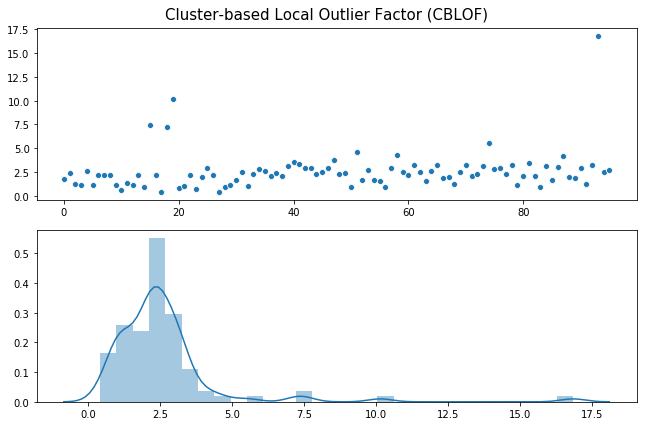

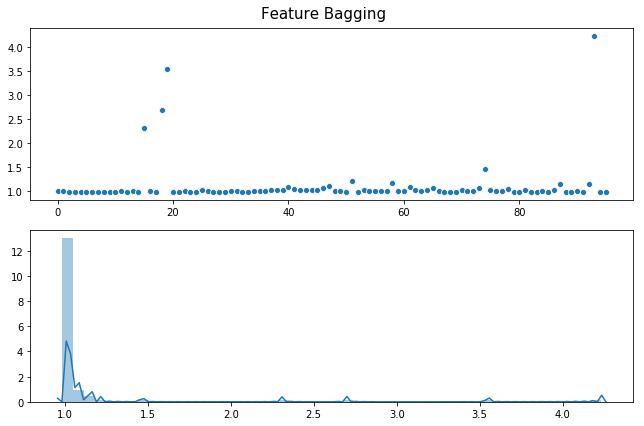

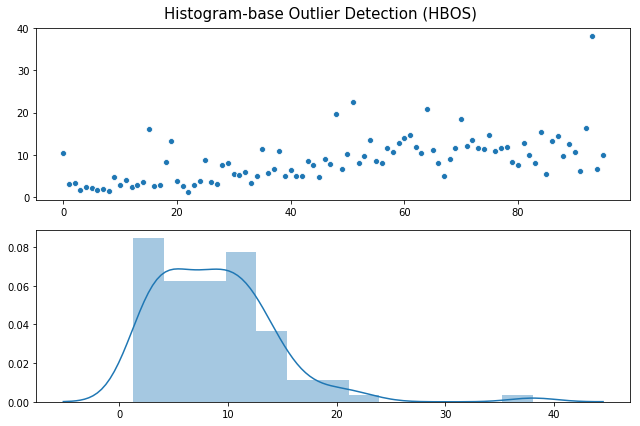

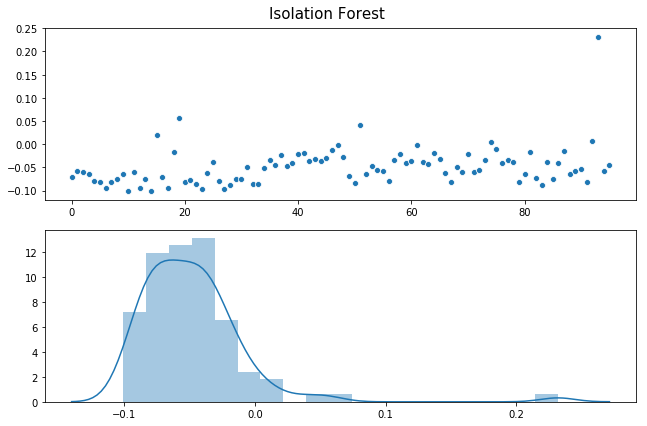

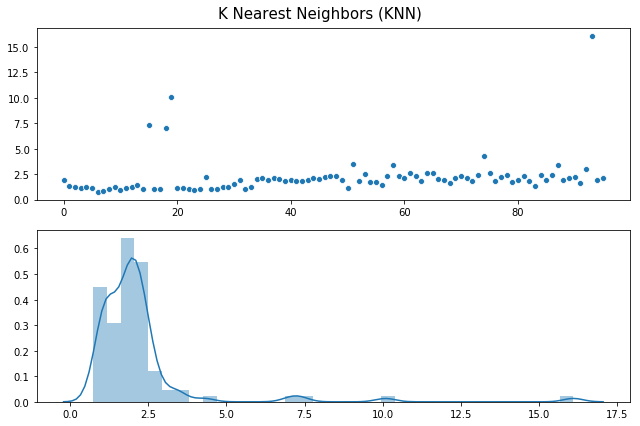

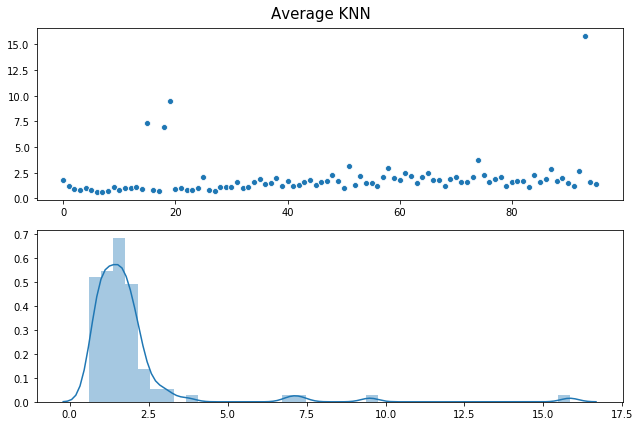

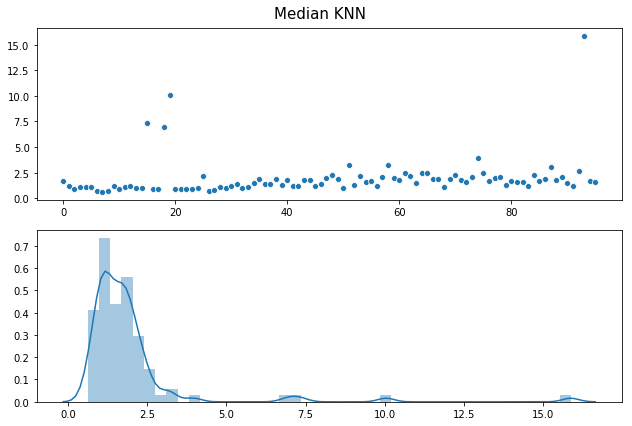

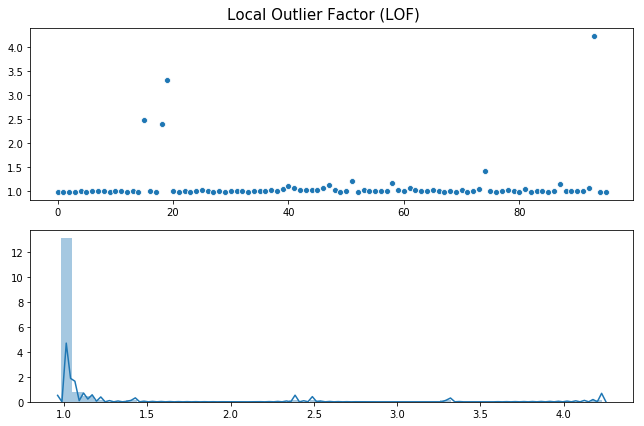

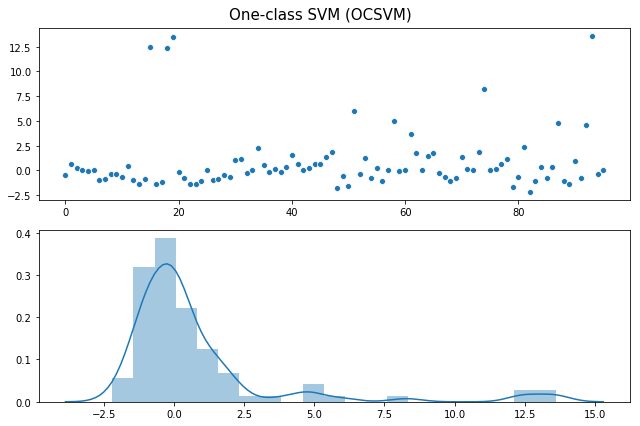

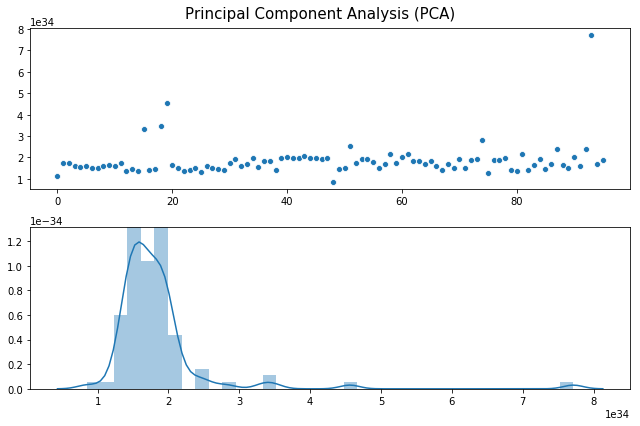

In [15]:
def visualize(score, title):
    fig = plt.figure(figsize=(9,6))
    ax1 = fig.add_subplot(211)
    sns.scatterplot(data=score, ax=ax1)
    ax2 = fig.add_subplot(212)
    sns.distplot(score, ax=ax2)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    fig.suptitle(title, fontsize=15)


# Import all models
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from scipy import stats

X = kpi_data_selected
# 不同异常值检测算法的比较
classifiers_pyod = {
               'Cluster-based Local Outlier Factor (CBLOF)':
                   CBLOF(contamination=outliers_fraction, 
                         check_estimator=False, random_state=random_state),
               'Feature Bagging':
                   FeatureBagging(LOF(n_neighbors=35),
                                  contamination=outliers_fraction,
                                  check_estimator=False,
                                  random_state=random_state),
               'Histogram-base Outlier Detection (HBOS)': 
                   HBOS(contamination=outliers_fraction),
               'Isolation Forest': 
                   IForest(contamination=outliers_fraction,
                           random_state=random_state),
               'K Nearest Neighbors (KNN)': 
                   KNN(contamination=outliers_fraction),
               'Average KNN': 
                   KNN(method='mean', contamination=outliers_fraction),
               'Median KNN': 
                   KNN(method='median', contamination=outliers_fraction),
               'Local Outlier Factor (LOF)':
                   LOF(n_neighbors=35, contamination=outliers_fraction),
               'One-class SVM (OCSVM)': 
                   OCSVM(contamination=outliers_fraction,
                         random_state=random_state),
               'Principal Component Analysis (PCA)': 
                   PCA(contamination=outliers_fraction, 
                       random_state=random_state),
               }

for i, (clf_name, clf) in enumerate(classifiers_pyod.items()):
    print('Model', i + 1, clf_name)
    clf.fit(X)
    y_pred = clf.predict(X)
    y_pred_scores = clf.decision_scores_
    print([i for i, e in enumerate(y_pred) if e==1])
    threshold = stats.scoreatpercentile(y_pred_scores, 100 * outliers_fraction)
    
    visualize(y_pred_scores, clf_name)

    outlier = [i for i, e in enumerate(y_pred) if e==1]
    print([index for index in X.index[outlier]])
    print('=' * 80)

In [16]:
kpi_data

,LTE_5017a,LTE_5025h,LTE_5572f,LTE_5218g,LTE_5048b,LTE_5880a,LTE_5137a,LTE_5134a,LTE_5216a,LTE_5441b,...,LTE_5289d,LTE_5276b,LTE_5273b,LTE_6265a,LTE_5204c,LTE_5646a,LTE_5311b,LTE_5305c,LTE_5256c,LTE_5471a
Time,,,,,,,,,,,,,,,,,,,,,
2018-09-01 17:30:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,58.833,0.135,-102.364,...,3334.683,4.917,1.100,10.0,100.0,100.0,0.004,0.000,0.0,2.333
2018-09-01 17:45:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,60.167,0.183,-102.763,...,3316.702,6.267,1.417,10.0,100.0,100.0,0.000,0.000,0.0,2.167
2018-09-01 18:00:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,61.167,0.183,-102.725,...,3364.344,6.583,1.467,10.0,100.0,100.0,0.000,0.000,0.0,2.333
2018-09-01 18:15:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,59.667,0.214,-102.764,...,3348.424,6.317,1.417,10.0,100.0,100.0,0.000,0.000,0.0,2.333
2018-09-01 18:30:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,60.167,0.155,-102.657,...,3477.425,6.550,1.450,10.0,100.0,100.0,0.000,0.000,0.0,2.167
2018-09-01 18:45:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,59.833,0.132,-102.768,...,3367.050,6.267,1.400,10.0,100.0,100.0,0.000,0.000,0.0,2.333
2018-09-01 19:00:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,60.667,0.140,-102.685,...,3405.762,6.583,1.467,10.0,100.0,100.0,0.001,0.000,0.0,2.167
2018-09-01 19:15:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,58.667,0.202,-102.716,...,3415.424,6.283,1.417,10.0,100.0,100.0,0.000,0.000,0.0,2.167
2018-09-01 19:30:00,100.000,0.000,0.0,100.0,100.000,100.000,0.0,59.500,0.169,-102.792,...,3316.189,6.433,1.433,10.0,100.0,100.0,0.000,0.000,0.0,2.167
